# Linear regression

In [77]:
import tensorflow as tf
print(tf.__version__)

2.6.0


### This is new chapter

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras import Model

Let's create noisy data (100 points) in form of `m * X + b = Y`:

tf.Tensor([0.85795844 0.09852159 0.33241475 ... 0.5833714  0.32129478 0.89405894], shape=(100000,), dtype=float32)


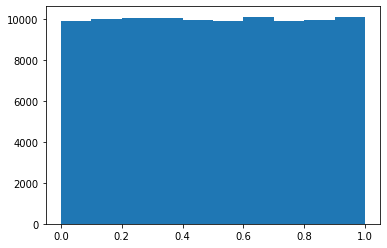

In [83]:
def make_noisy_data(w=0.1, b=0.5, n=100):
    x = tf.random.uniform(shape=(n, ))
    noise = tf.random.normal(shape=(len(x), ), stddev=0.01)
    y = w * x + b + noise
    return x, y

In [84]:
X, Y = make_noisy_data()

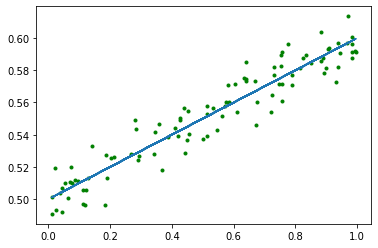

In [86]:
plt.plot(X, Y, 'g.')
plt.plot(X, 0.1*X+0.5)

In [61]:
X

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([0.38424003, 0.989861  , 0.981593  , 0.8362249 , 0.95192444,
       0.90513885, 0.63519514, 0.9277097 , 0.6739987 , 0.61235905,
       0.72966325, 0.3086989 , 0.598089  , 0.8182874 , 0.3548348 ,
       0.98859715, 0.5655602 , 0.5924145 , 0.22300768, 0.3747629 ,
       0.04700494, 0.798102  , 0.5906409 , 0.38417792, 0.94532144,
       0.990018  , 0.3242718 , 0.90857315, 0.25458813, 0.17126822,
       0.5347284 , 0.95124996, 0.09137523, 0.19303727, 0.75429094,
       0.9159627 , 0.8036151 , 0.25263464, 0.09886241, 0.02157044,
       0.11456656, 0.38767755, 0.68802834, 0.3106084 , 0.8212061 ,
       0.14260924, 0.5409272 , 0.54260457, 0.4757774 , 0.4358729 ,
       0.32040095, 0.48834217, 0.6583903 , 0.22938335, 0.46629298,
       0.15182912, 0.6142658 , 0.6768272 , 0.98735726, 0.27484322,
       0.8021933 , 0.14002573, 0.48980367, 0.5421673 , 0.44093692,
       0.9239265 , 0.8469713 , 0.83908546, 0.3850491 , 0.33798337,
       0.33437

(array([16., 23., 21., 15., 25.]),
 array([0.00458574, 0.2016722 , 0.39875865, 0.5958451 , 0.79293156,
        0.990018  ], dtype=float32),
 <a list of 5 Patch objects>)

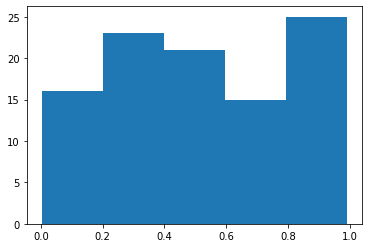

In [62]:
plt.hist(X, bins=5)

In [87]:
w = tf.Variable(0.)
b = tf.Variable(0.)

In [88]:
def predict(x):
    y = w * x + b
    return y

In [89]:
def mean_squared_error(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

In [92]:
loss = mean_squared_error(predict(X), Y)
print("Starting loss", loss.numpy())

Starting loss 0.30612245


In [93]:
learning_rate = 0.05
steps = 200

for i in range(steps):

    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)

    gradients = tape.gradient(loss, [w, b])

    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

    if i % 20 == 0:
        print("Step %d, Loss %f" % (i, loss.numpy()))

Step 0, Loss 0.306122
Step 20, Loss 0.002706
Step 40, Loss 0.001159
Step 60, Loss 0.000880
Step 80, Loss 0.000677
Step 100, Loss 0.000527
Step 120, Loss 0.000416
Step 140, Loss 0.000333
Step 160, Loss 0.000272
Step 180, Loss 0.000227


In [94]:
print("After {} steps we learned that w={} and b={}".format(steps, w.numpy(), b.numpy()))

After 200 steps we learned that w=0.1298549771308899 and b=0.48310521245002747


In [96]:
print(w.numpy(), b.numpy())

0.12985498 0.4831052


In [97]:
w.numpy(), b.numpy()

(0.12985498, 0.4831052)

In [98]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.12985498>

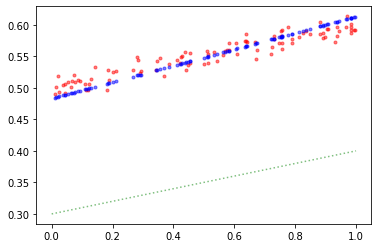

In [99]:
plt.plot(X, Y, 'r.', alpha=0.5)
plt.plot([0,1], [0.1*0+0.3, 0.1*1+0.3], 'g:', alpha=0.5)
plt.plot(X, predict(X), 'b.', alpha=0.5)

Step 0, Loss 0.000194
Step 20, Loss 0.000188
Step 40, Loss 0.000183
Step 60, Loss 0.000178
Step 80, Loss 0.000173
Step 100, Loss 0.000169
Step 120, Loss 0.000165
Step 140, Loss 0.000161
Step 160, Loss 0.000157
Step 180, Loss 0.000154


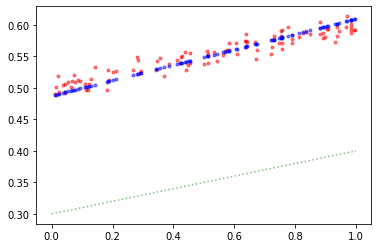

In [100]:
learning_rate = 0.01
steps = 200

for i in range(steps):

    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)

    gradients = tape.gradient(loss, [w, b])

    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

    if i % 20 == 0:
        print("Step %d, Loss %f" % (i, loss.numpy()))
        
plt.plot(X, Y, 'r.', alpha=0.5)
plt.plot([0,1], [0.1*0+0.3, 0.1*1+0.3], 'g:', alpha=0.5)
plt.plot(X, predict(X), 'b.', alpha=0.5)

In [103]:
min_loss = mean_squared_error(0.1*X+0.3, Y)
print("Minimum loss", min_loss.numpy())

Minimum loss 0.04011249


In [104]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=0.0034530666>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.0019523312>]

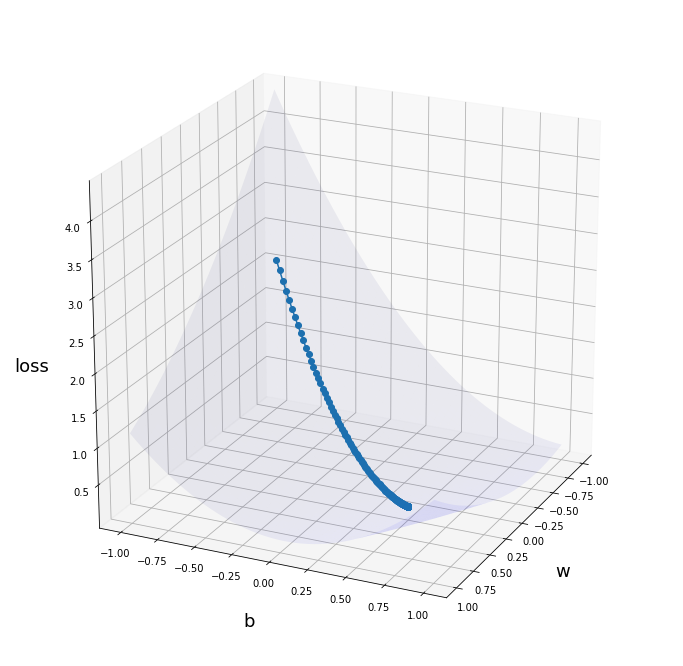

In [105]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

ws = np.linspace(-1, 1)
bs = np.linspace(-1, 1)
w_mesh, b_mesh = np.meshgrid(ws, bs)


def loss_for_values(w, b):
    y = w * X + b
    loss = mean_squared_error(y, Y)
    return loss


zs = np.array([
    loss_for_values(w, b) for (w, b) in zip(np.ravel(w_mesh), np.ravel(b_mesh))
])
z_mesh = zs.reshape(w_mesh.shape)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(w_mesh, b_mesh, z_mesh, color='b', alpha=0.06)

w = tf.Variable(-.5)
b = tf.Variable(-.75)

history = []

for i in range(steps):
    with tf.GradientTape() as tape:
        predictions = predict(X)
        loss = mean_squared_error(predictions, Y)
    gradients = tape.gradient(loss, [w, b])
    history.append((w.numpy(), b.numpy(), loss.numpy()))
    w.assign_sub(gradients[0] * learning_rate)
    b.assign_sub(gradients[1] * learning_rate)

# Plot the trajectory
ax.plot([h[0] for h in history], [h[1] for h in history],
        [h[2] for h in history],
        marker='o')

ax.set_xlabel('w', fontsize=18, labelpad=20)
ax.set_ylabel('b', fontsize=18, labelpad=20)
ax.set_zlabel('loss', fontsize=18, labelpad=20)

ax.view_init(elev=22, azim=25)
plt.show()